In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.metrics import accuracy_score

In [2]:
df = pd.read_csv('Iris CLassification.csv')

In [3]:
df.head()

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


# Exporatory Data Analysis

In [4]:
df.describe()

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm
count,150.000000,150.000000,150.000000,145.000000
mean,5.644627,3.054667,3.758667,1.236552
std,1.312781,0.433123,1.764420,0.755058
min,0.055000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.400000
50%,5.700000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   sepal_length_cm  150 non-null    float64
 1   sepal_width_cm   150 non-null    float64
 2   petal_length_cm  150 non-null    float64
 3   petal_width_cm   145 non-null    float64
 4   class            150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


<AxesSubplot:>

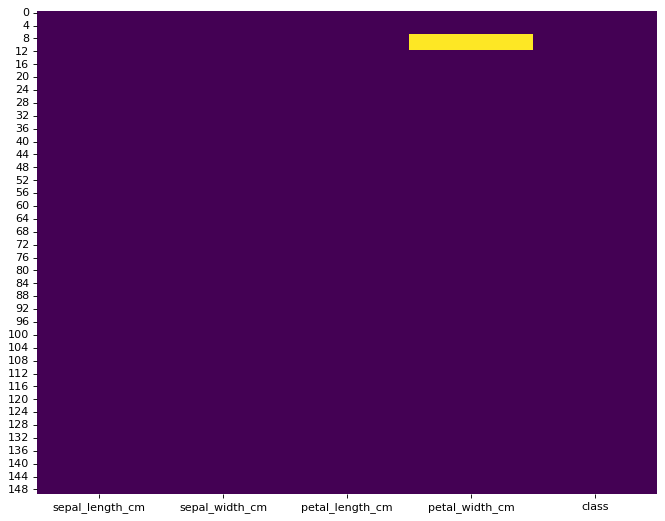

In [6]:
plt.figure(figsize=(10,8),dpi=80)
sns.heatmap(df.isnull(),cbar=False,cmap='viridis')

C:\Users\disha\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='petal_width_cm', ylabel='Density'>

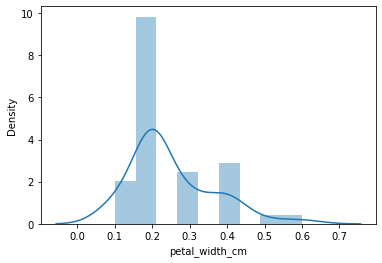

In [7]:
sns.distplot(df.loc[df['class']=="Iris-setosa"]['petal_width_cm'])

In [8]:
df.loc[df['class'] == "Iris-setosa"]['petal_width_cm'].mean()

0.25

In [9]:
df['petal_width_cm'] = df['petal_width_cm'].fillna(df.loc[df['class'] == "Iris-setosa"]['petal_width_cm'].mean())

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   sepal_length_cm  150 non-null    float64
 1   sepal_width_cm   150 non-null    float64
 2   petal_length_cm  150 non-null    float64
 3   petal_width_cm   150 non-null    float64
 4   class            150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


<AxesSubplot:>

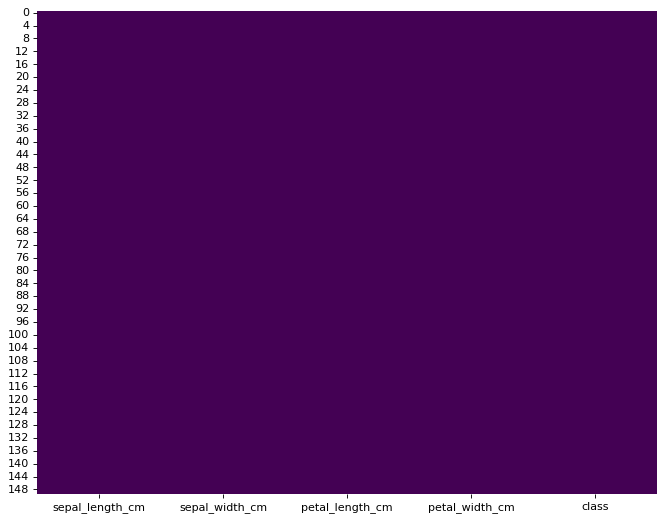

In [11]:
plt.figure(figsize=(10,8),dpi=80)
sns.heatmap(df.isnull(),cbar=False,cmap='viridis')

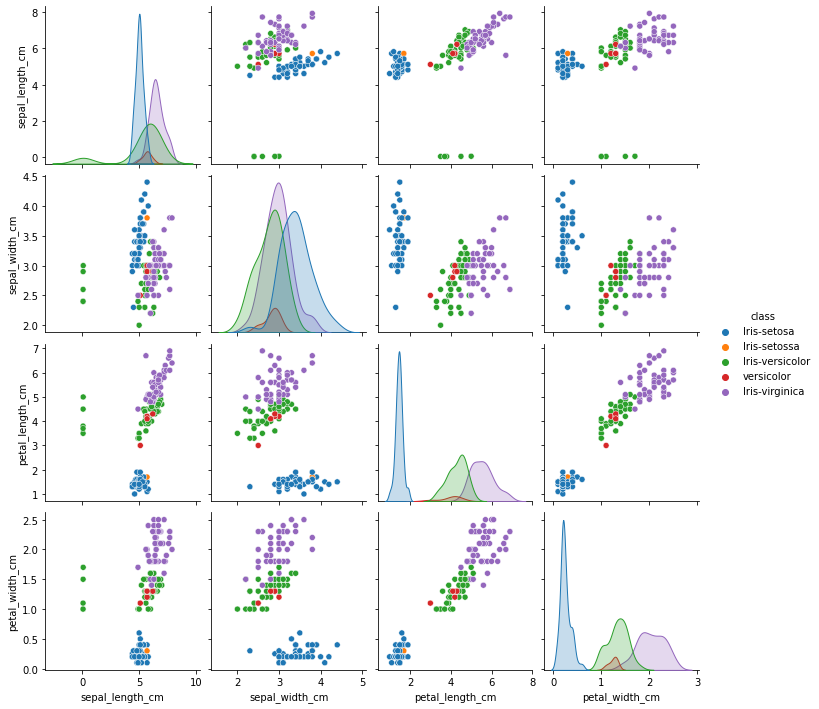

In [12]:
sns.pairplot(df, hue='class', height=2.5)

In [13]:
df['class'].value_counts()

Iris-virginica     50
Iris-setosa        49
Iris-versicolor    45
versicolor          5
Iris-setossa        1
Name: class, dtype: int64

In [14]:
df['class'].replace(["Iris-setossa","versicolor"], ["Iris-setosa","Iris-versicolor"], inplace=True)
df['class'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: class, dtype: int64

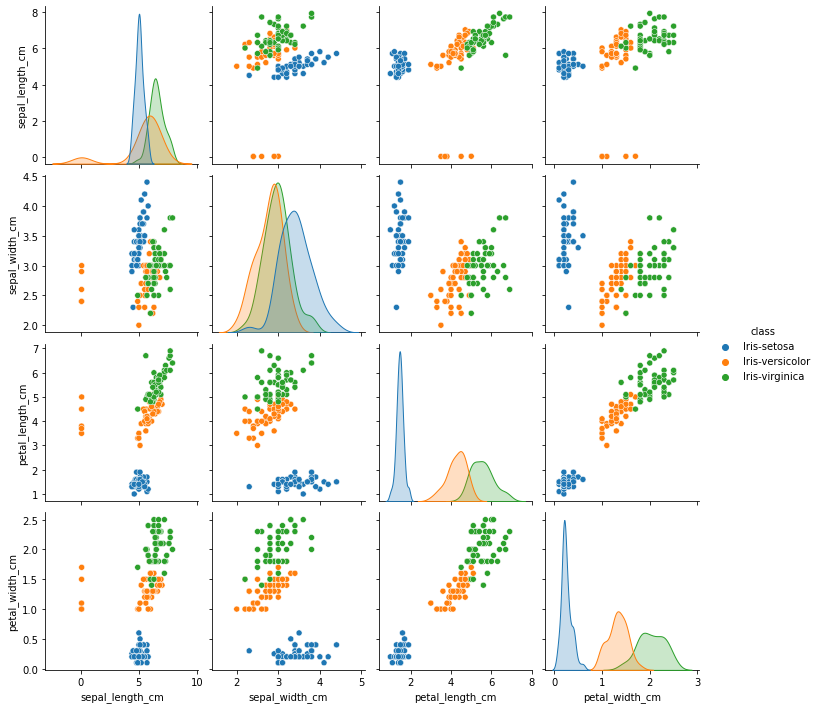

In [15]:
sns.pairplot(df, hue='class', height=2.5)

# Data Pre-Processing

In [16]:
X = df.drop(['class'],axis=1)
y = df['class']

In [17]:
from sklearn.preprocessing import StandardScaler

In [18]:
scaler = StandardScaler()
X = pd.DataFrame((dict(zip(X.columns,scaler.fit_transform(X).T))))

In [19]:
X.head()

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm
0,-0.416255,1.031636,-1.341272,-1.319393
1,-0.569113,-0.126638,-1.341272,-1.319393
2,-0.721972,0.336672,-1.398138,-1.319393
3,-0.798401,0.105017,-1.284407,-1.319393
4,-0.492684,1.263291,-1.341272,-1.319393


In [20]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42)

# Logistic Regression

In [21]:
from sklearn.linear_model import LogisticRegression

In [22]:
logReg = LogisticRegression()

In [23]:
logReg.fit(X_train,y_train)

LogisticRegression()

In [24]:
print("Training Accuracy:", logReg.score(X_train,y_train))

Training Accuracy: 0.9523809523809523


In [25]:
print("Testing Accuracy:", logReg.score(X_test,y_test))

Testing Accuracy: 1.0
